## **Libraries Import**

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
import skimage.feature
from sklearn.cluster import KMeans;
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay

## **Load the Dataset**

In [ ]:
images = np.load('sample_data/trnImage.npy')
print(images.shape)

test_images = np.load('sample_data/tstImage.npy')
print(test_images.shape)

labels = np.load('sample_data/trnLabel.npy')
print(labels.shape)

test_labels = np.load('sample_data/tstLabel.npy')
print(test_labels.shape)

(32, 32, 3, 10000)
(32, 32, 3, 1000)
(10000, 1)
(1000, 1)


##**Image Feature Extraction proccess**

In [ ]:
image_index = 1
image = images[:, :, :, image_index]

hog_feature, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)

print(f'The extracted feature vector is of length {hog_feature.shape[0]} per sample')

The extracted feature vector is of length 15876 per sample


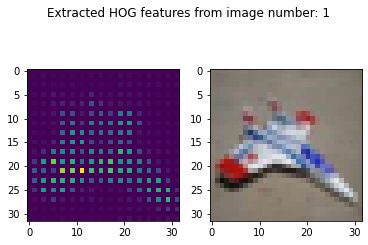

In [ ]:
plot.figure()
plot.subplot(121)
plot.imshow(hog_image)
plot.subplot(122)
plot.imshow(image)
plot.suptitle(f'Extracted HOG features from image number: {image_index}')
plot.show(block=False)

## **K-Means**

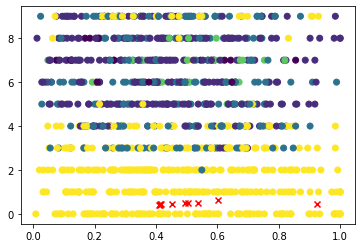

In [ ]:
train_KM = np.reshape(images, (10000, 3072))
test_KM = np.reshape(test_images, (1000, 3072))

km = KMeans(n_clusters=10, n_init = 1).fit(train_KM);

predicted = km.predict(test_KM);

centroids = km.cluster_centers_;

plot.scatter(test_KM[:,-1], test_labels[:,-1], c = predicted);

plot.scatter(centroids[:,0], centroids[:,1], color='red', marker='x');

##**Artificial Neural Network (ANN)**

In [ ]:
train_ANN = np.reshape(images, (10000, 32, 32, 3))
print(train_ANN.shape)

test_ANN = np.reshape(test_images, (1000, 32, 32, 3))
print(test_ANN.shape)

label_ANN = labels.reshape(-1)
print(label_ANN.shape)

test_label_ANN = test_labels.reshape(-1)
print(test_label_ANN.shape)

(10000, 32, 32, 3)
(1000, 32, 32, 3)
(10000,)
(1000,)


In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1500, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(train_ANN, label_ANN, epochs=10)

Epoch 1/10
313/313 [==============================] - 26s 83ms/step - loss: 2.3302 - accuracy: 0.1080
Epoch 2/10
313/313 [==============================] - 25s 81ms/step - loss: 2.2620 - accuracy: 0.1436
Epoch 3/10
313/313 [==============================] - 25s 81ms/step - loss: 2.2124 - accuracy: 0.1902
Epoch 4/10
313/313 [==============================] - 25s 81ms/step - loss: 2.1480 - accuracy: 0.2174
Epoch 5/10
313/313 [==============================] - 26s 84ms/step - loss: 2.0804 - accuracy: 0.2389
Epoch 6/10
313/313 [==============================] - 25s 81ms/step - loss: 2.0286 - accuracy: 0.2708
Epoch 7/10
313/313 [==============================] - 25s 80ms/step - loss: 1.9565 - accuracy: 0.3030
Epoch 8/10
313/313 [==============================] - 26s 83ms/step - loss: 1.8949 - accuracy: 0.3247
Epoch 9/10
313/313 [==============================] - 25s 81ms/step - loss: 1.8148 - accuracy: 0.3584
Epoch 10/10
313/313 [==============================] - 25s 81ms/step - loss: 1.749

In [ ]:
results = ann.evaluate(test_ANN, test_label_ANN)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%');

32/32 [==============================] - 1s 31ms/step - loss: 2.5533 - accuracy: 0.1020
Test set loss: 2.55, test set accuracy: 10.20%


In [ ]:
ann.summary();

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_47 (Flatten)        (None, 3072)              0         
                                                                 
 dense_186 (Dense)           (None, 3000)              9219000   
                                                                 
 dense_187 (Dense)           (None, 1500)              4501500   
                                                                 
 dense_188 (Dense)           (None, 10)                15010     
                                                                 
Total params: 13,735,510
Trainable params: 13,735,510
Non-trainable params: 0
_________________________________________________________________


32/32 [==============================] - 1s 35ms/step


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


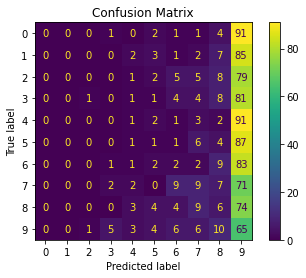

In [ ]:
predicted = ann.predict(test_ANN)

predicted = (predicted[:,-1]*100-1).astype(int)
predicted = np.array([9 if e > 9 else e for e in predicted])

cm = confusion_matrix(test_label_ANN, predicted)

cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[np.unique(label_ANN)])

cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
cmd_obj.ax_.yaxis.set_ticklabels(np.unique(label_ANN))
cmd_obj.ax_.xaxis.set_ticklabels(np.unique(label_ANN))

plot.show()

## **Convolutional Neural Network (CNN)**

In [ ]:
train_CNN = np.reshape(images, (10000, 32, 32, 3))
print(train_CNN.shape)

test_CNN = np.reshape(test_images, (1000, 32, 32, 3))
print(test_CNN.shape)

label_CNN = labels.reshape(-1)
print(label_CNN.shape)

test_label_CNN = test_labels.reshape(-1)
print(test_label_CNN.shape)

(10000, 32, 32, 3)
(1000, 32, 32, 3)
(10000,)
(1000,)


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam', 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]);

cnn.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_45 (Flatten)        (None, 7200)              0         
                                                                 
 dense_181 (Dense)           (None, 3000)              21603000  
                                                                 
 dense_182 (Dense)           (None, 10)                30010     
                                                                 
Total params: 21,633,906
Trainable params: 21,633,906
Non-trainable params: 0
_________________________________________

In [ ]:
cnn.fit(train_CNN, label_CNN, epochs=10, batch_size=32)

Epoch 1/10
313/313 [==============================] - 75s 239ms/step - loss: 2.3189 - accuracy: 0.1648
Epoch 2/10
313/313 [==============================] - 68s 216ms/step - loss: 1.4773 - accuracy: 0.4182
Epoch 3/10
313/313 [==============================] - 68s 217ms/step - loss: 0.9132 - accuracy: 0.6430
Epoch 4/10
313/313 [==============================] - 67s 213ms/step - loss: 0.6042 - accuracy: 0.7767
Epoch 5/10
313/313 [==============================] - 66s 209ms/step - loss: 0.3986 - accuracy: 0.8652
Epoch 6/10
313/313 [==============================] - 65s 209ms/step - loss: 0.2511 - accuracy: 0.9266
Epoch 7/10
313/313 [==============================] - 68s 216ms/step - loss: 0.2023 - accuracy: 0.9394
Epoch 8/10
313/313 [==============================] - 65s 208ms/step - loss: 0.1294 - accuracy: 0.9680
Epoch 9/10
313/313 [==============================] - 79s 254ms/step - loss: 0.0967 - accuracy: 0.9755
Epoch 10/10
313/313 [==============================] - 74s 236ms/step - l

In [ ]:
results = cnn.evaluate(test_CNN, test_label_CNN);

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%');

32/32 [==============================] - 3s 99ms/step - loss: 6.0459 - accuracy: 0.1850
Test set loss: 6.05, test set accuracy: 18.50%


32/32 [==============================] - 3s 94ms/step


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


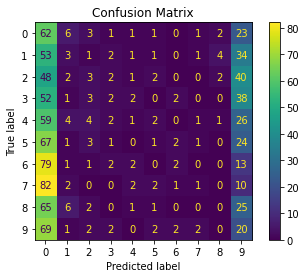

In [ ]:
predicted = cnn.predict(test_CNN)

predicted = ((predicted[:,-1]*1000)-1).astype(int)
predicted = np.array([9 if e > 9 else e for e in predicted])

cm = confusion_matrix(test_label_CNN, predicted)

cmd_obj = ConfusionMatrixDisplay(cm, display_labels=[np.unique(label_CNN)])

cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
cmd_obj.ax_.yaxis.set_ticklabels(np.unique(label_CNN))
cmd_obj.ax_.xaxis.set_ticklabels(np.unique(label_CNN))

plot.show()